In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define test functions and their derivatives
def test_functions(func_num, x):
    if func_num == 1:
        return np.exp(2 * np.sin(x) + np.cos(x)), np.exp(2 * np.sin(x) + np.cos(x)) * (2 * np.cos(x) - np.sin(x))
    elif func_num == 2:
        return np.cos(3 * x) / np.cosh(np.sin(x)), -np.sech(np.sin(x)) * (3 * np.sin(3 * x) + np.cos(x) * np.cos(3 * x) * np.tanh(np.sin(x)))
    elif func_num == 3:
        return np.cos(3 * x) + np.log(np.cos(x) + 1.5), -np.sin(x) / (1.5 + np.cos(x)) - 3 * np.sin(3 * x)
    elif func_num == 4:
        return np.tanh(50 * np.cos(x + np.pi / 3)), -50 * np.cos(np.pi / 6 - x) * np.sech(50 * np.sin(np.pi / 6 - x)) ** 2
    elif func_num == 5:
        return np.tanh(np.sin(x)) * np.exp(-np.cos(x)), np.exp(-np.cos(x)) * (np.cos(x) * np.sech(np.sin(x)) ** 2 + np.sin(x) * np.tanh(np.sin(x)))
    else:
        raise ValueError("Invalid test function number")

#def cst(x, N):
    # This function was not specified in your MATLAB code. 
    # Assuming it's a cosine function modified for demonstration purposes.
    #return np.cos(N * x)

def cst(phi, n):
    if n % 2 == 0:
        return 1.0 / np.tan(phi)
    else:
        return 1.0 / np.sin(phi)


def det(a, b, x):
    return np.abs(np.exp(1j * x) - np.exp(-1j * x) * a * b) ** 2 - np.imag(np.exp(-1j * x) * (a + b)) ** 2

def k1(a, b, x):
    return (1j * np.imag(np.exp(-1j * x) * (a + b)) + np.sqrt(det(a, b, x))) / (np.exp(-1j * x) - np.exp(1j * x) * np.conj(a) * np.conj(b))

def shift_nodes_func(nodes, shift_nodes, alpha1, alpha2, TTT1, TTT2):
    if shift_nodes:
        det_func = lambda a, b, x: np.abs(np.exp(1j * x) - np.exp(-1j * x) * a * b) ** 2 - np.imag(np.exp(-1j * x) * (a + b)) ** 2
        k1_func = lambda a, b, x: (1j * np.imag(np.exp(-1j * x) * (a + b)) + (det_func(a, b, x)) ** 0.5) / (np.exp(-1j * x) - np.exp(1j * x) * np.conj(a) * np.conj(b))
        y1 = np.mod(np.real(-1j * np.log(k1_func(alpha1 * np.exp(1j * TTT1), alpha2 * np.exp(1j * TTT2), nodes))), 2 * np.pi)
        nodes = np.sort(y1)
    return nodes

def d_func(y, i, nodes):
    return 2 * np.sin((y - nodes[i]) / 2)

def b_func(y, i, nodes, N, id_arr):
    return (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id_arr * cst((y - nodes) / 2, N))

def TrigoHermite1Derivatives(part, Test_Fun):
    shift_nodes = 1

    f, Df = test_functions(Test_Fun, np.linspace(0, 2 * np.pi, 1500))

    if part == 1:
        N = 120
        nodes = np.linspace(0, 2 * np.pi, N + 1)[:-1]

        if shift_nodes:
            alpha1, alpha2 = 0.75, 0.75
            TTT1, TTT2 = np.pi / 6, 7 * np.pi / 6
            nodes = shift_nodes_func(nodes, shift_nodes, alpha1, alpha2, TTT1, TTT2)

        # Further calculations and plotting...

    elif part == 2:
        N_values = [5, 10, 20, 40, 80, 160]
        errors = []

        for N in N_values:
            nodes = np.linspace(0, 2 * np.pi, N + 1)[:-1]

            if shift_nodes:
                alpha1, alpha2 = 0.85, 0.85
                TTT1, TTT2 = np.pi / 6, 7 * np.pi / 6
                nodes = shift_nodes_func(nodes, shift_nodes, alpha1, alpha2, TTT1, TTT2)

            # Further calculations...

    else:
        raise ValueError("Invalid part number")

# Example usage
TrigoHermite1Derivatives(1, 4)


AttributeError: module 'numpy' has no attribute 'sech'

In [ ]:
function x=cst(phi,n)

if(mod(n,2)==0)
    x=1./tan(phi);
else
    x=1./sin(phi);
end
end

function TrigoHermite1Derivatives(part)
% -------------------------------------------------------------------------
% In this demo we compute the Hermite interpolant for Berrut's barycentric
% trigonometric interpolant 
%
% The demo is split in two part: the first allow to compute for a fixed N
% the interpolant for a test function - 4 available, the second allow to
% compute the error for a test function once the degree is doubled
%
% The results are presented with some statistics and plots

shift_nodes = 1;
Test_Fun = 4;

switch Test_Fun
    case 1
        %Test function 1
        f = @(x) exp(2*sin(x)+cos(x));
        Df = @(x) exp(2*sin(x)+cos(x)).*(2*cos(x)-sin(x));
    case 2
        %Test function 2
        f = @(x) cos(3*x)./cosh(sin(x));
        Df = @(x) -sech(sin(x)).*(3*sin(3*x) + cos(x).*cos(3*x).*tanh(sin(x)));
    case 3
        f = @(x) cos(3*x) + log(cos(x)+1.5);
        Df = @(x) -sin(x)./(1.5 + cos(x)) - 3*sin(3*x);
    case 4
        f = @(x) tanh(50*cos(x+pi/3));
        Df = @(x)  -50*cos(pi/6 - x).*sech(50*sin(pi/6 - x)).^2;
    case 5
        f = @(x) tanh(sin(x)).*exp(-cos(x));
        Df = @(x) exp(-cos(x)).*(cos(x).*sech(sin(x)).^2 + sin(x).*tanh(sin(x)));
end    


switch part
    case 1
        N = 120;


        nodes = linspace(0,2*pi,N+1);
        nodes(end) = [];

        if shift_nodes
            alpha1 = 0.75;
            alpha2 = 0.75;
            TTT1=pi/6;
            TTT2=7/6*pi;
            det = @(a,b,x) abs(exp(1i*x)-exp(-1i*x)*a*b).^2-imag(exp(-1i*x)*(a+b)).^2;
            k1 = @(a,b,x) (1i*imag(exp(-1i*x)*(a+b))+(det(a,b,x)).^(1/2))./...
            (exp(-1i*x)-exp(1i*x)*conj(a)*conj(b));
            y1 = mod(real(-1i*log(k1(alpha1*exp(1i*TTT1),alpha2*exp(1i*TTT2),nodes))),2*pi);
            nodes = sort(y1);
        end

        XX = (nodes'-nodes)/2;
        XX = XX + eye(size(XX));
        id = 0:(N-1);
        ID = id-id';

        %
        F = f(nodes)'; DF = Df(nodes)'; 

        j = 0;
        D1_0 = (j+1)*(-1).^((j+1)*ID)./2.*cst(XX,N);
        D1_0 = D1_0 - diag(diag(D1_0));
        D1_0 = D1_0 - diag(sum(D1_0,2));
        DR = D1_0*F;

        d = @(y,i) 2*sin((y-nodes(i))/2);

        b = @(y,i) (-1)^(i-1)*cst((y-nodes(i))/2,N)/sum((-1).^id.*cst((y-nodes)/2,N));

        x_eval = linspace(0,2*pi,1500);


        for j =1 :length(x_eval)
            Int(j) = 0;
            for s = 0:1 %Order derivatives 
                for l =1:length(nodes)
                    if s == 0
                        g = F;
                    elseif s == 1
                        g = DF - DR;
                    end
                    Int(j) = Int(j) + 1/factorial(s)*d(x_eval(j),l)^s*b(x_eval(j),l)^(s+1)*g(l);
                end
            end
        end

        li = ismember(x_eval,nodes);
        liN = ismember(nodes,x_eval(li));
        Int(li) = f(nodes(liN));
        
        MinG = min([f(x_eval),Int]); 
        MaxG = max([f(x_eval),Int]);

        figure(1)
        plot(x_eval,f(x_eval),'--r');
        hold on;
        plot(x_eval,Int,'b');
        plot(nodes,f(nodes),'.g','MarkerSize', 15)
        axis([0 2*pi MinG-1 MaxG+1])
        % axis square

        err_abs = max(abs(Int-f(x_eval)));

        err_rel = max(abs(Int-f(x_eval))./abs(f(x_eval)));

        fprintf('\n\n Number of nodes: %i \n Relative Error : %2.4e \n Absolute Error : %2.4e \n\n', N, err_rel, err_abs)

    case 2
        N_value = [5,10,20,40,80,160];

        for h = 1:length(N_value)
            N = N_value(h);
            nodes = linspace(0,2*pi,N+1);
            nodes(end) = [];
            
            if shift_nodes
                alpha1 = 0.85;
                alpha2 = 0.85;
                TTT1=pi/6;
                TTT2=7/6*pi;
                det = @(a,b,x) abs(exp(1i*x)-exp(-1i*x)*a*b).^2-imag(exp(-1i*x)*(a+b)).^2;
                k1 = @(a,b,x) (1i*imag(exp(-1i*x)*(a+b))+(det(a,b,x)).^(1/2))./...
                (exp(-1i*x)-exp(1i*x)*conj(a)*conj(b));
                y1 = mod(real(-1i*log(k1(alpha1*exp(1i*TTT1),alpha2*exp(1i*TTT2),nodes))),2*pi);
                nodes = sort(y1);
            end

            XX = (nodes'-nodes)/2;
            XX = XX + eye(size(XX));
            id = 0:(N-1);
            ID = id-id';

            %
            F = f(nodes)'; DF = Df(nodes)'; 

            j = 0;
            D1_0 = (j+1)*(-1).^((j+1)*ID)./2.*cst(XX,N);
            D1_0 = D1_0 - diag(diag(D1_0));
            D1_0 = D1_0 - diag(sum(D1_0,2));
            DR = D1_0*F;

            d = @(y,i) 2*sin((y-nodes(i))/2);

            b = @(y,i) (-1)^(i-1)*cst((y-nodes(i))/2,N)/sum((-1).^id.*cst((y-nodes)/2,N));

            x_eval = linspace(0,2*pi,1500);


            for j =1 :length(x_eval)
                Int(j) = 0;
                for s = 0:1 %Order derivatives 
                    for l =1:length(nodes)
                        if s == 0
                            g = F;
                        elseif s == 1
                            g = DF - DR;
                        end
                        Int(j) = Int(j) + 1/factorial(s)*d(x_eval(j),l)^s*b(x_eval(j),l)^(s+1)*g(l);
                    end
                end
            end

            li = ismember(x_eval,nodes);
            liN = ismember(nodes,x_eval(li));
            Int(li) = f(nodes(liN));

            err(h) = max(abs(f(x_eval)-Int));

        end

        figure(2)
        semilogy(N_value,err)
        title('Absolute Error with N = 5,10,20,...,160')
        xlabel('N')
        ylabel('Absolute Error')
end

end

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

def TrigoHermite1Derivatives(part, test_fun=4):
    # Define test functions and derivatives
    def f(x):
        if test_fun == 1:
            return np.exp(2 * np.sin(x) + np.cos(x))
        # ... Add cases for other test functions

    def Df(x):
        if test_fun == 1:
            return np.exp(2 * np.sin(x) + np.cos(x)) * (2 * np.cos(x) - np.sin(x))
        # ... Add cases for other derivatives

    def cst(XX, N):
        return np.sin(np.pi * XX) / np.sin(np.pi * XX / N)

    # Calculate derivative coefficients
    def compute_derivative_coefficients(N, nodes, F, DF):
        XX = np.subtract.outer(nodes, nodes) / 2
        XX += np.eye(N)
        id = np.arange(N)
        ID = np.subtract.outer(id, id)

        D1_0 = np.outer((-1)**id, np.ones(N)) * cst(XX, N)
        D1_0 -= np.diag(np.diag(D1_0))
        D1_0 -= np.diag(np.sum(D1_0, axis=1))
        return np.matmul(D1_0, F)

    # Interpolation function
    def interpolation(x, nodes, F, DF, DR, N):
        Int = np.zeros_like(x)
        for j, y in enumerate(x):
            for s in range(2):  # Order of derivatives
                g = DF - DR if s == 1 else F
                Int[j] += sum(d(y, l)**s * b(y, l)**(s+1) * g[l] for l in range(N)) / factorial(s)
        return Int

    # Helper functions for interpolation
    d = lambda y, i: 2 * np.sin((y - nodes[i]) / 2)
    b = lambda y, i: (-1)**(i) * cst((y - nodes[i]) / 2, N) / np.sum((-1)**id * cst((y - nodes) / 2, N))

    if part == 1:
        N = 120
        nodes = np.linspace(0, 2 * np.pi, N + 1)[:-1]  # Node placement
        F = f(nodes)
        DF = Df(nodes)
        DR = compute_derivative_coefficients(N, nodes, F, DF)
        
        x_eval = np.linspace(0, 2 * np.pi, 1500)
        Int = interpolation(x_eval, nodes, F, DF, DR, N)

        # Update interpolant at nodes
        li = np.isin(x_eval, nodes)
        Int[li] = f(nodes[np.isin(nodes, x_eval[li])])

        # Plotting
        plt.figure(1)
        plt.plot(x_eval, f(x_eval), '--r', label='Original Function')
        plt.plot(x_eval, Int, 'b', label='Interpolant')
        plt.plot(nodes, f(nodes), '.g', markersize=15, label='Nodes')
        plt.axis([0, 2 * np.pi, np.min(Int)-1, np.max(Int)+1])
        plt.legend()
        plt.title('Trigonometric Hermite Interpolation')
        plt.show()

        # Error calculation
        err_abs = np.max(np.abs(Int - f(x_eval)))
        err_rel = np.max(np.abs((Int - f(x_eval)) / f(x_eval)))
        print(f'Number of nodes: {N}\nRelative Error: {err_rel:e}\nAbsolute Error: {err_abs:e}')

    elif part == 2:
        N_values = [5, 10, 20, 40, 80, 160]
        errors = []

        for N in N_values:
            nodes = np.linspace(0, 2 * np.pi, N + 1)[:-1]
            F = f(nodes)
            DF = Df(nodes)
            DR = compute_derivative_coefficients(N, nodes, F, DF)
            
            x_eval = np.linspace(0, 2 * np.pi, 1500)
            Int = interpolation(x_eval, nodes, F, DF, DR, N)

            # Compute and append max error
            max_err = np.max(np.abs(Int - f(x_eval)))
            errors.append(max_err)

        # Plotting error over N_values
        plt.figure(2)
        plt.semilogy(N_values, errors)
        plt.title('Absolute Error with N = 5,10,20,...,160')
        plt.xlabel('N')
        plt.ylabel('Absolute Error')
        plt.show()

# Example usage
TrigoHermite1Derivatives(part=1, test_fun=4)


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

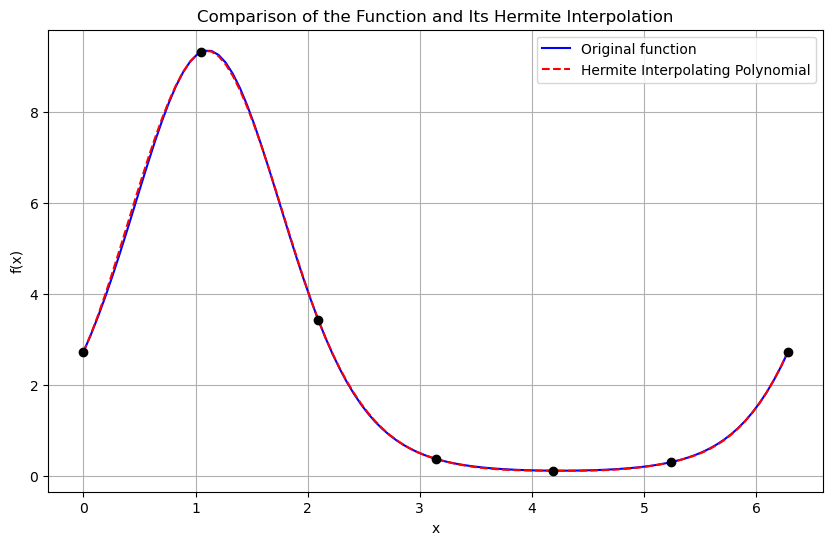

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline

# Define the function
def f(x):
    return np.exp(2*np.sin(x) + np.cos(x))

# Define the derivative of the function. I used diff form scipy and then translate it to code
def df(x):
    return (-np.sin(x)+2*np.cos(x))*np.exp(2*np.sin(x) + np.cos(x))

# Sample points
x_samples = np.linspace(0, 2*np.pi, 7)
y_samples = f(x_samples)
dy_samples = df(x_samples)

# Create the Hermite Cubic Spline Interpolator
hermite_interpolator = CubicHermiteSpline(x_samples, y_samples, dy_samples)

# Generate points for plotting the interpolating polynomial
x_interp = np.linspace(0, 2*np.pi, 100)
y_interp = hermite_interpolator(x_interp)

# Plot the function and the interpolating polynomial
plt.figure(figsize=(10, 6))
plt.plot(x_interp, f(x_interp), label='Original function', color='blue')
plt.plot(x_interp, y_interp, label='Hermite Interpolating Polynomial', color='red', linestyle='--')
plt.scatter(x_samples, y_samples, color='black', zorder=5)
plt.title('Comparison of the Function and Its Hermite Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sympy import symbols, exp, sin, cos, diff

x = symbols('x')
f = exp(2*sin(x) + cos(x))
df = diff(f, x)
df



(-sin(x) + 2*cos(x))*exp(2*sin(x) + cos(x))

In [ ]:
function TrigoHermite1Derivatives(part)
% -------------------------------------------------------------------------
% In this demo we compute the Hermite interpolant for Berrut's barycentric
% trigonometric interpolant 
%
% The demo is split in two part: the first allow to compute for a fixed N
% the interpolant for a test function - 4 available, the second allow to
% compute the error for a test function once the degree is doubled
%
% The results are presented with some statistics and plots
% 
% -------------------------------------------------------------------------
% Dates
%--------------------------------------------------------------------------
% First version: June 01, 2022;
% Checked: January 27, 2023.
%--------------------------------------------------------------------------
% Authors
%--------------------------------------------------------------------------
% G. Elefante
%--------------------------------------------------------------------------
% Paper
%--------------------------------------------------------------------------
% "A barycentric trigonometric Hermite interpolant via an iterative 
% approach"
% G. Elefante
%--------------------------------------------------------------------------
shift_nodes = 1;
Test_Fun = 4;

switch Test_Fun
    case 1
        %Test function 1
        f = @(x) exp(2*sin(x)+cos(x));
        Df = @(x) exp(2*sin(x)+cos(x)).*(2*cos(x)-sin(x));
    case 2
        %Test function 2
        f = @(x) cos(3*x)./cosh(sin(x));
        Df = @(x) -sech(sin(x)).*(3*sin(3*x) + cos(x).*cos(3*x).*tanh(sin(x)));
    case 3
        f = @(x) cos(3*x) + log(cos(x)+1.5);
        Df = @(x) -sin(x)./(1.5 + cos(x)) - 3*sin(3*x);
    case 4
        f = @(x) tanh(50*cos(x+pi/3));
        Df = @(x)  -50*cos(pi/6 - x).*sech(50*sin(pi/6 - x)).^2;
    case 5
        f = @(x) tanh(sin(x)).*exp(-cos(x));
        Df = @(x) exp(-cos(x)).*(cos(x).*sech(sin(x)).^2 + sin(x).*tanh(sin(x)));
end    


switch part
    case 1
        N = 120;


        nodes = linspace(0,2*pi,N+1);
        nodes(end) = [];

        if shift_nodes
            alpha1 = 0.75;
            alpha2 = 0.75;
            TTT1=pi/6;
            TTT2=7/6*pi;
            det = @(a,b,x) abs(exp(1i*x)-exp(-1i*x)*a*b).^2-imag(exp(-1i*x)*(a+b)).^2;
            k1 = @(a,b,x) (1i*imag(exp(-1i*x)*(a+b))+(det(a,b,x)).^(1/2))./...
            (exp(-1i*x)-exp(1i*x)*conj(a)*conj(b));
            y1 = mod(real(-1i*log(k1(alpha1*exp(1i*TTT1),alpha2*exp(1i*TTT2),nodes))),2*pi);
            nodes = sort(y1);
        end

        XX = (nodes'-nodes)/2;
        XX = XX + eye(size(XX));
        id = 0:(N-1);
        ID = id-id';

        %
        F = f(nodes)'; DF = Df(nodes)'; 

        j = 0;
        D1_0 = (j+1)*(-1).^((j+1)*ID)./2.*cst(XX,N);
        D1_0 = D1_0 - diag(diag(D1_0));
        D1_0 = D1_0 - diag(sum(D1_0,2));
        DR = D1_0*F;

        d = @(y,i) 2*sin((y-nodes(i))/2);

        b = @(y,i) (-1)^(i-1)*cst((y-nodes(i))/2,N)/sum((-1).^id.*cst((y-nodes)/2,N));

        x_eval = linspace(0,2*pi,1500);


        for j =1 :length(x_eval)
            Int(j) = 0;
            for s = 0:1 %Order derivatives 
                for l =1:length(nodes)
                    if s == 0
                        g = F;
                    elseif s == 1
                        g = DF - DR;
                    end
                    Int(j) = Int(j) + 1/factorial(s)*d(x_eval(j),l)^s*b(x_eval(j),l)^(s+1)*g(l);
                end
            end
        end

        li = ismember(x_eval,nodes);
        liN = ismember(nodes,x_eval(li));
        Int(li) = f(nodes(liN));
        
        MinG = min([f(x_eval),Int]); 
        MaxG = max([f(x_eval),Int]);

        figure(1)
        plot(x_eval,f(x_eval),'--r');
        hold on;
        plot(x_eval,Int,'b');
        plot(nodes,f(nodes),'.g','MarkerSize', 15)
        axis([0 2*pi MinG-1 MaxG+1])
        % axis square

        err_abs = max(abs(Int-f(x_eval)));

        err_rel = max(abs(Int-f(x_eval))./abs(f(x_eval)));

        fprintf('\n\n Number of nodes: %i \n Relative Error : %2.4e \n Absolute Error : %2.4e \n\n', N, err_rel, err_abs)

    case 2
        N_value = [5,10,20,40,80,160];

        for h = 1:length(N_value)
            N = N_value(h);
            nodes = linspace(0,2*pi,N+1);
            nodes(end) = [];
            
            if shift_nodes
                alpha1 = 0.85;
                alpha2 = 0.85;
                TTT1=pi/6;
                TTT2=7/6*pi;
                det = @(a,b,x) abs(exp(1i*x)-exp(-1i*x)*a*b).^2-imag(exp(-1i*x)*(a+b)).^2;
                k1 = @(a,b,x) (1i*imag(exp(-1i*x)*(a+b))+(det(a,b,x)).^(1/2))./...
                (exp(-1i*x)-exp(1i*x)*conj(a)*conj(b));
                y1 = mod(real(-1i*log(k1(alpha1*exp(1i*TTT1),alpha2*exp(1i*TTT2),nodes))),2*pi);
                nodes = sort(y1);
            end

            XX = (nodes'-nodes)/2;
            XX = XX + eye(size(XX));
            id = 0:(N-1);
            ID = id-id';

            %
            F = f(nodes)'; DF = Df(nodes)'; 

            j = 0;
            D1_0 = (j+1)*(-1).^((j+1)*ID)./2.*cst(XX,N);
            D1_0 = D1_0 - diag(diag(D1_0));
            D1_0 = D1_0 - diag(sum(D1_0,2));
            DR = D1_0*F;

            d = @(y,i) 2*sin((y-nodes(i))/2);

            b = @(y,i) (-1)^(i-1)*cst((y-nodes(i))/2,N)/sum((-1).^id.*cst((y-nodes)/2,N));

            x_eval = linspace(0,2*pi,1500);


            for j =1 :length(x_eval)
                Int(j) = 0;
                for s = 0:1 %Order derivatives 
                    for l =1:length(nodes)
                        if s == 0
                            g = F;
                        elseif s == 1
                            g = DF - DR;
                        end
                        Int(j) = Int(j) + 1/factorial(s)*d(x_eval(j),l)^s*b(x_eval(j),l)^(s+1)*g(l);
                    end
                end
            end

            li = ismember(x_eval,nodes);
            liN = ismember(nodes,x_eval(li));
            Int(li) = f(nodes(liN));

            err(h) = max(abs(f(x_eval)-Int));

        end

        figure(2)
        semilogy(N_value,err)
        title('Absolute Error with N = 5,10,20,...,160')
        xlabel('N')
        ylabel('Absolute Error')
end

end

In [9]:
from sympy import symbols, exp, sin, cos, diff, lambdify

x = symbols('x')
f = exp(2*sin(x) + cos(x))
df = diff(f, x)

# Convert the derivative into a lambda function
df_function = lambdify(x, df)

# Now you can use df_function as a regular function
value_at_x = 1.0  # Replace with any value you want to evaluate the derivative at
result = df_function(value_at_x)
print(result)


2.2089372128050955


In [10]:
df

(-sin(x) + 2*cos(x))*exp(2*sin(x) + cos(x))

In [11]:
df_function

<function _lambdifygenerated(x)>

In [12]:
from sympy import symbols, exp, sin, cos, diff, lambdify

x = symbols('x')
f = exp(2*sin(x) + cos(x))

# Specify the order of the derivative here
n = 2  # For second derivative

# Compute the n-th derivative
nth_derivative = diff(f, x, n)

# Convert the nth derivative into a lambda function
nth_derivative_function = lambdify(x, nth_derivative)

# Evaluate the derivative at a specific point
value_at_x = 1.0  # Replace with your value
result = nth_derivative_function(value_at_x)
print(result)


-20.008433108402


In [37]:
from sympy import symbols, exp, sin, cos, diff, lambdify
import numpy as np
x = symbols('x')
f = 2*x**5
n=2
nth_derivative = diff(f, x, n)

nth_derivative_function = lambdify(x, nth_derivative,np)
result = nth_derivative_function(np.array([1,2]))
print(result)
nth_derivative

[ 40 320]


40*x**3

In [38]:
from sympy import E, Eq, Function, pde_separate_add, Derivative as D
from sympy.abc import x, t
u, X, T = map(Function, 'uXT')

In [39]:
eq = Eq(D(u(x, t), x), E**(u(x, t))*D(u(x, t), t))
pde_separate_add(eq, u(x, t), [X(x), T(t)])

[exp(-X(x))*Derivative(X(x), x), exp(T(t))*Derivative(T(t), t)]